In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline


heart_data = pd.read_csv('./train.csv')
heart_test = pd.read_csv('./test.csv')

In [31]:
heart_data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [62]:
heart_data.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,43.734045,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,1.000000,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,76.000000,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,113.500000,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,151.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


In [32]:
heart_test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,57,1,0,150,276,0,0,112,1,0.6,1,1,1
1,2,59,1,3,170,288,0,0,159,0,0.2,1,0,3
2,3,57,1,2,150,126,1,1,173,0,0.2,2,1,3
3,4,56,0,0,134,409,0,0,150,1,1.9,1,2,3
4,5,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [33]:
X_train = heart_data.iloc[:,1:-1]
y_train = heart_data.iloc[:,-1]

In [34]:
X_test = heart_test.iloc[:,1:]

In [35]:
from sklearn.metrics import accuracy_score
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)

test_preds = logistic_regression_model.predict(X_test)

In [36]:
submission = pd.read_csv('./sample_submission.csv')
submission['target'] = test_preds

submission.to_csv('baseline.csv',index = False)

In [37]:
# # 1. 데이터 가공, StandardScaler 진행한 후 test data 만들어서 설계 진행
# idx_nm_1 = heart_data[heart_data['restecg']==2].index
# idx_nm_2 = heart_data[heart_data['thal']<1].index
# heart_df = heart_data.drop(idx_nm_1)
# heart_df = heart_data.drop(idx_nm_2)

sample_train_x = heart_data.drop(["restecg","chol","fbs","trestbps"],axis=1)
idx_nm_2 = heart_data[heart_data['thal']<1].index
sample_train_x = heart_data.drop(idx_nm_2)

In [39]:
# # StandardScaler 진행
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# scaler.fit(heart_df)
# heart_scaled = scaler.transform(heart_df)
# heart_df_scaled = pd.DataFrame(data = heart_scaled, columns = heart_df.columns)
# heart_df_scaled.head()

StandardScaler 진행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(sample_train_x)
heart_scaled = scaler.transform(sample_train_x)
heart_df_scaled = pd.DataFrame(data = heart_scaled, columns = heart_df.columns)
heart_df_scaled.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-1.715478,-0.169217,0.675508,0.892316,-0.115040,-0.847848,2.291288,-1.000675,0.048674,-0.696526,0.200053,-2.151913,-0.662471,-0.581238,0.910642
1,-1.692495,-0.281530,0.675508,1.841588,1.113538,0.946633,2.291288,0.948692,1.165309,-0.696526,0.200053,-0.584986,-0.662471,1.162476,0.910642
2,-1.669511,-0.056905,0.675508,-0.056956,3.347317,0.680126,-0.436436,-1.000675,1.895417,-0.696526,-0.907933,0.981941,0.429514,1.162476,-1.098127
3,-1.646528,-1.067716,-1.480368,-1.006228,0.331716,-0.154929,-0.436436,-1.000675,0.048674,1.435697,-0.723269,-0.584986,-0.662471,-0.581238,0.910642
4,-1.623545,-2.190839,0.675508,-0.056956,-0.561795,-0.936683,-0.436436,0.948692,0.993519,-0.696526,-0.907933,0.981941,-0.662471,-0.581238,0.910642


In [40]:
X_train = heart_df_scaled.iloc[:, 1:-1] # id와 target을 제거
y_train = heart_df.iloc[:, -1] 

In [41]:
# 다시 Logistic Regession 수행하고, 처음해서 logistic으로 돌려보자.
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)

logistic_preds = logistic_regression_model.predict(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['target'] = test_preds

submission.to_csv('logistic_regression_1.csv',index = False)

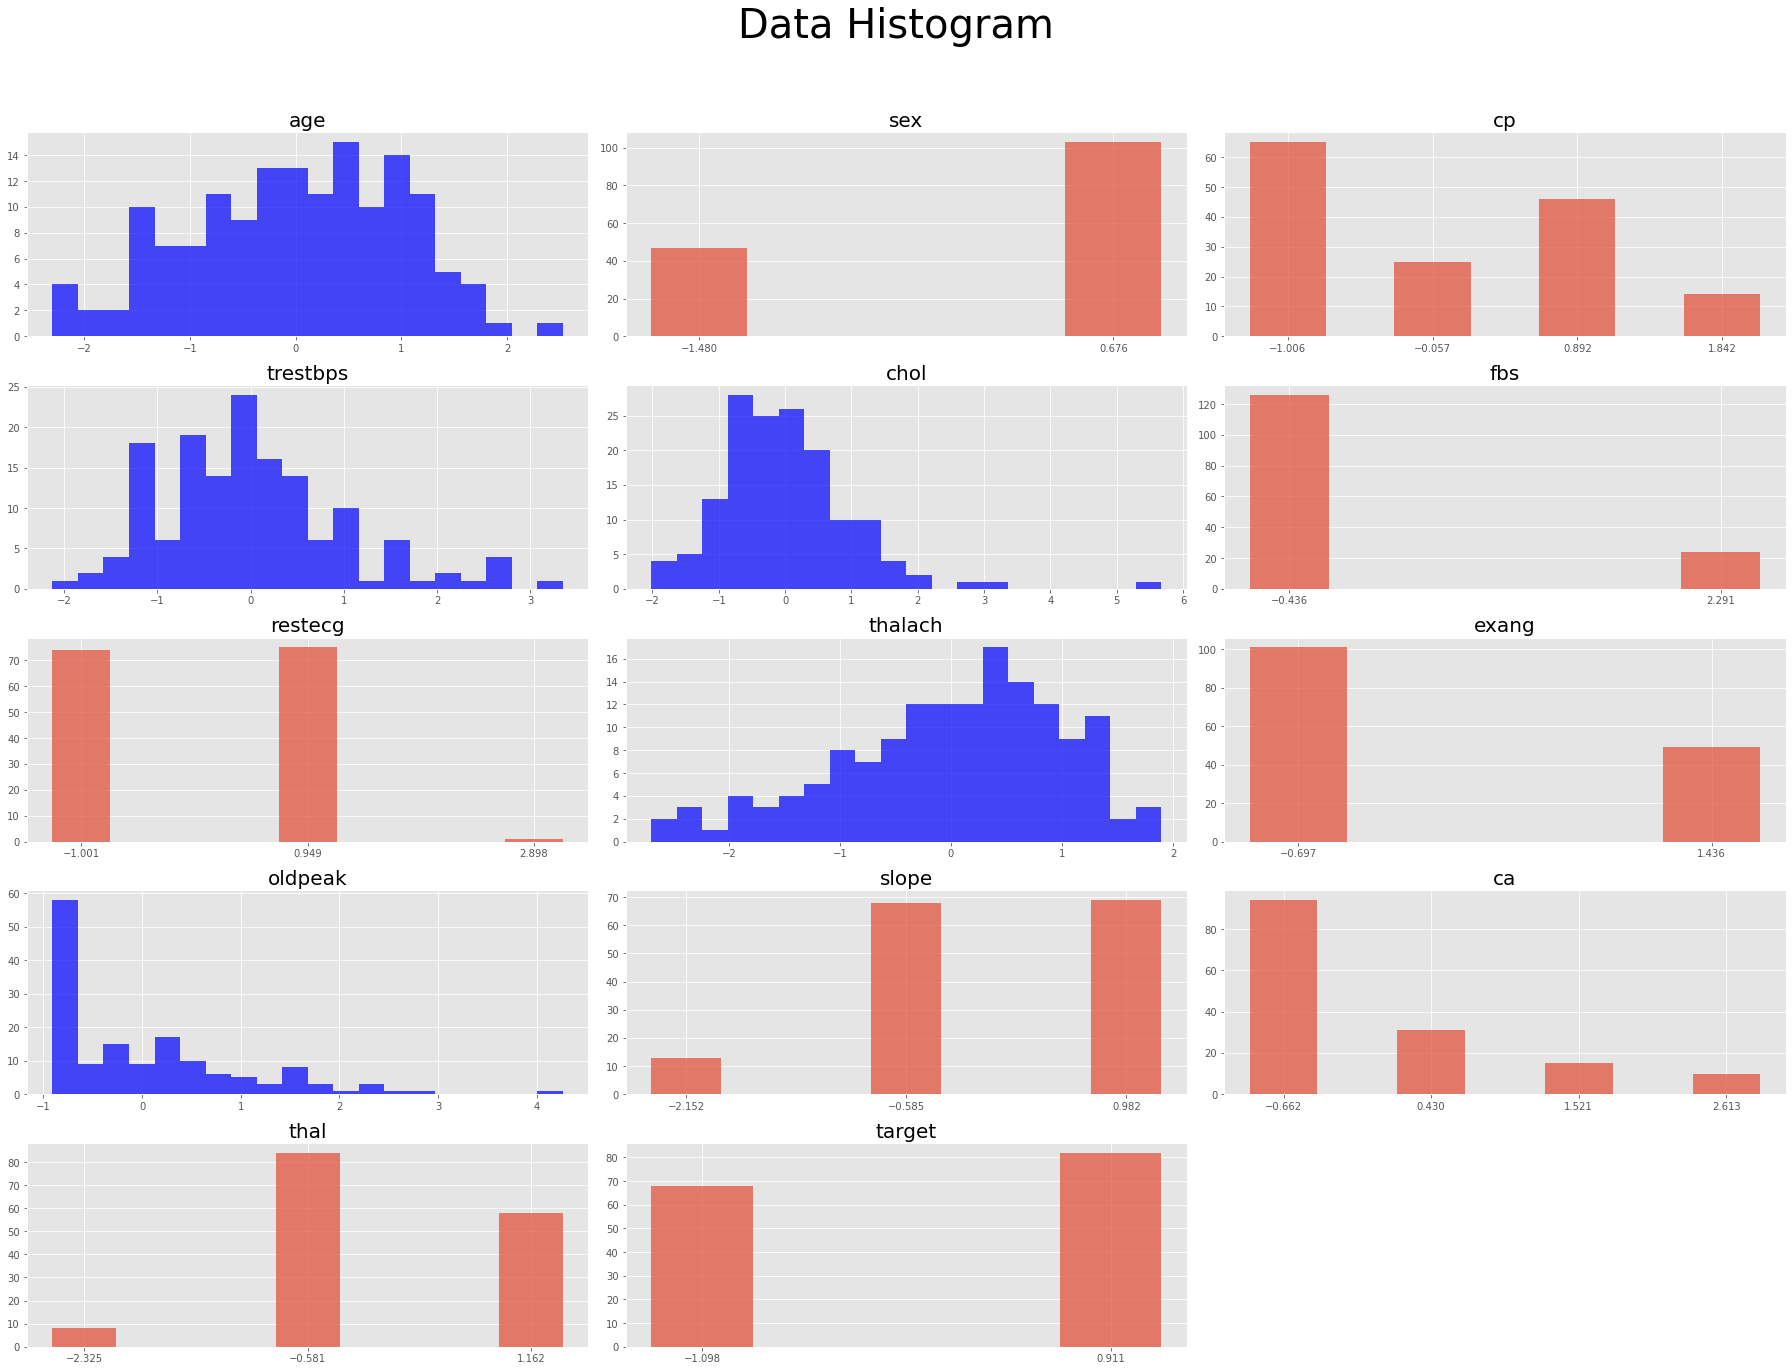

In [42]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = heart_df_scaled.columns[1:]
for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(heart_df_scaled[cols[i]].unique()) > 20:
        plt.hist(heart_df_scaled[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = heart_df_scaled[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [25]:
# Import library
import pandas as pd
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import csv

# Model list
def models(model):
    if model == 'knn':
        mod = KNeighborsClassifier(2)
    elif model == 'svm':
        mod = SVC(kernel="linear", C=0.025)
    elif model == 'svm2':
        mod = SVC(gamma=2, C=1)
    elif model == 'gaussian':
        mod = GaussianProcessClassifier(1.0 * RBF(1.0))
    elif model == 'tree':
        mod =  DecisionTreeClassifier(max_depth=5)
    elif model == 'forest':
        mod =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    elif model == 'mlp':
        mod = MLPClassifier(alpha=1, max_iter=1000)
    elif model == 'adaboost':
        mod = AdaBoostClassifier()
    elif model == 'gaussianNB':
        mod = GaussianNB()
    elif model == 'qda':
        mod = QuadraticDiscriminantAnalysis()
    return mod

## Data load
datapath = 'C:/Users/leech/Dacon1/'
train_data = pd.read_csv(datapath + 'train.csv').to_numpy()
test_data = pd.read_csv(datapath + 'test.csv').to_numpy()

#make model list in models function
model_list = ['knn', 'svm', 'svm2', 'gaussian', 'tree', 'forest', 'mlp', 'adaboost', 'gaussianNB', 'qda']

cnt = 0
empty_list = [] #empty list for progress bar in tqdm library
for model in tqdm(model_list, desc = 'Models are training and predicting ... '):
    empty_list.append(model) # fill empty_list to fill progress bar
    #classifier
    clf = models(model)

    #Training
    clf.fit(train_data[:,1:-1], train_data[:,-1:].T[0]) #학습할때는 id와 target을 제외하고 학습! 마지막 column이 라벨이므로 라벨로 설정!

    #Predict
    pred = clf.predict(test_data[:,1:]) #마찬가지로 예측을 할 때에도 id를 제외하고 나머지 feature들로 예측

    #Make answer sheet
    savepath = datapath + 'answers/' #정답지 저장 경로
    with open(savepath + '%s_answer.csv' % model_list[cnt], 'w', newline='') as f:
        sheet = csv.writer(f)
        sheet.writerow(['id', 'target'])
        for idx, p in enumerate(pred):
            sheet.writerow([idx+1, p])

    cnt += 1

Models are training and predicting ... : 100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 16.99it/s]


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier 

params = {'n_estimators' : [100,500],'learning_rate' : [0.05,0.1]}
gb_clf = GradientBoostingClassifier(random_state = 0)
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 6, verbose =1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))
gb_preds = grid_cv.best_estimator_.predict(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['target'] = test_preds

submission.to_csv('GBM_1.csv',index = False)

Fitting 6 folds for each of 4 candidates, totalling 24 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도:0.8400


In [61]:
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier(random_state = 156)
parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring ='accuracy', cv = 5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7800
